In [2]:
%autosave 60

Autosaving every 60 seconds


# Домашнее задание EDA | МТС Тета
-----
- Нужно провести EDA любого датасета на ваше усмотрение в специально подготовленном ipynb
- В этом ноутбуке будут блоки под разные типы графиков
- Нужно выбрать такой датасет, который позволит построить каждый из этих графиков корректно
- В ноутбуке так же будет дополнительное поле для графика на ваш выбор. В нем должен быть график, который не был построен ранее в ноутбуке (другой тип графика)
- Ноутбук должен отбегать в режиме run all, а так же сохранять все изображения шаблонным образом, как заложено в ноутбуке
- Для каждого графика должны быть написаны выводы
- __Вместе с ноутбуком нужно сдать сохраненные изображения (проверьте корректность их сохранения перед отправкой ДЗ)__
- изображения должны быть в формате png или jpeg. Не сохраняйте изображения в html (так делает plotly)
____
**Критерии оценки**
- Вы построили все основные графики без критических ошибок – 8 баллов
- Вы выполнили пункт 1, а так же построили дополнительный график - 10 баллов
- Доп. баллы выставляются за победу в tinder игре – подробности будут позже. Но чтобы в ней победить, ваш график должен оказаться самым красивым. 
- Доп. Баллы получат топ 10 человек итогового рейтинга. 
---
- Максимум 10 баллов (и +5 дополнительных)
- 1-4 балла: незачет
- 5-6 баллов: 3, незачет
- 7-8 баллов: 4, зачет
- 9-10 баллов: 5, зачет

## подготовка

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import mplcyberpunk

plt.style.use('cyberpunk')


In [4]:
# подставьте ваше имя и фамилию в эту переменную как в примере, (например Максим_Шаланкин)
image_name_prefix = 'Богдан_Горбачев'

# можно поменять, а можно оставить - сюда будут сохраняться изображения
path_to_save_images = 'images'

In [5]:
os.makedirs(path_to_save_images, exist_ok=True)

Я решил провести анализ песен со Spotify за 2023 год: [датасет на Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data)

In [6]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')

In [7]:
display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

У нас количество прослушиваний имеет тип `object`, не порядок, надо заменить его на тип `int`

In [9]:
df = df[
    ~df['streams'].str.startswith('BP')
]
df['streams'] = df['streams'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


Теперь порядок, смотрим дальше

In [11]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## (1) line plot

Посмотрим, сколько всего песен было выпущено в каждый год и посмотрим их динамику

In [12]:
df_1 = df.value_counts('released_year').reset_index().sort_values('released_year')
#display(df_1)

df_1 = df_1[
    df_1['released_year'] >= 1999
]

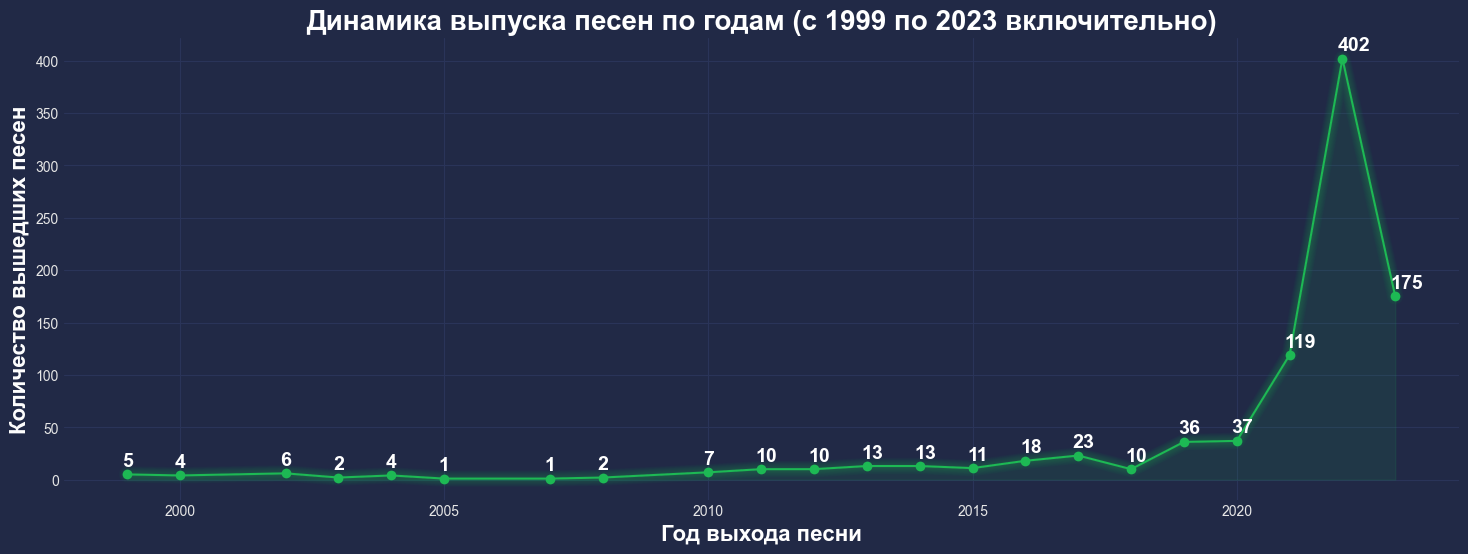

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(18, 6))


lol = plt.plot(df_1['released_year'], df_1['count'], color='#1DB954', marker='o', linestyle='-')


plt.title('Динамика выпуска песен по годам (с 1999 по 2023 включительно)', fontsize=20, fontweight='bold', fontname='Arial', color='white')
plt.xlabel('Год выхода песни', fontsize=16, fontweight='bold', fontname='Arial', color='white')
plt.ylabel('Количество вышедших песен', fontsize=16, fontweight='bold', fontname='Arial', color='white')


for x, y in zip(df_1['released_year'], df_1['count']):
    plt.text(x - 0.1, y + 4, str(y), ha='left', va='bottom', fontsize=14, fontweight='bold', fontname='Arial', color='white')

mplcyberpunk.add_glow_effects()

plt.show()
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_1.png')
)

#### выводы (1): написать выводы

Как можно видеть по динамике графика, **самое наибольшое количество песен было выпущено в 2022 году (402)**, так же в целом **прослеживается тенденция к росту количества песен** относительно прошлого года. Правда есть некоторые сомнения насчет 2023 года, надо проверить, почему так мало песен по сравению с 2022 годом: правда ли было выпущено меньше или просто в данные не полностью вошел 2023 год

In [14]:
df_2023 = df[
    df['released_year'] == 2023
]
df_2023.value_counts('released_month')

released_month
3    37
6    32
5    29
2    23
4    21
1    19
7    14
Name: count, dtype: int64

Да, я так и думал, просто из-за того, что последние данные датируются июлем 2023 года, то песен, выпущенных до 3 квартала 2023 года действительно меньше, чем за весь 2022 год

## (2) (bar plot или stacked bar plot)

Теперь посмотрим, топ 10 самых популярных треков по прослушиваемости, а также артистов, выпустивших эти клипы в период с 1999 по 2023 год включительно

In [15]:
df_1999_2023 = df[
    df['released_year'] >= 1999
]
df_1999_2023

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [16]:
df_2 = df_1999_2023.groupby(['artist(s)_name']).agg(
    total_streams = ('streams', 'sum'),
    total_songs = ('artist(s)_name', 'count')
).reset_index().sort_values('total_streams', ascending = False).head(10)

df_2

,artist(s)_name,total_streams,total_songs
534,The Weeknd,14185552870,22
524,Taylor Swift,14053658300,34
145,Ed Sheeran,13908947204,9
204,Harry Styles,11608645649,17
41,Bad Bunny,9997799607,19
404,Olivia Rodrigo,7442148916,7
155,Eminem,6183805596,4
69,Bruno Mars,5846920599,4
23,Arctic Monkeys,5569806731,4
210,Imagine Dragons,5272484650,3


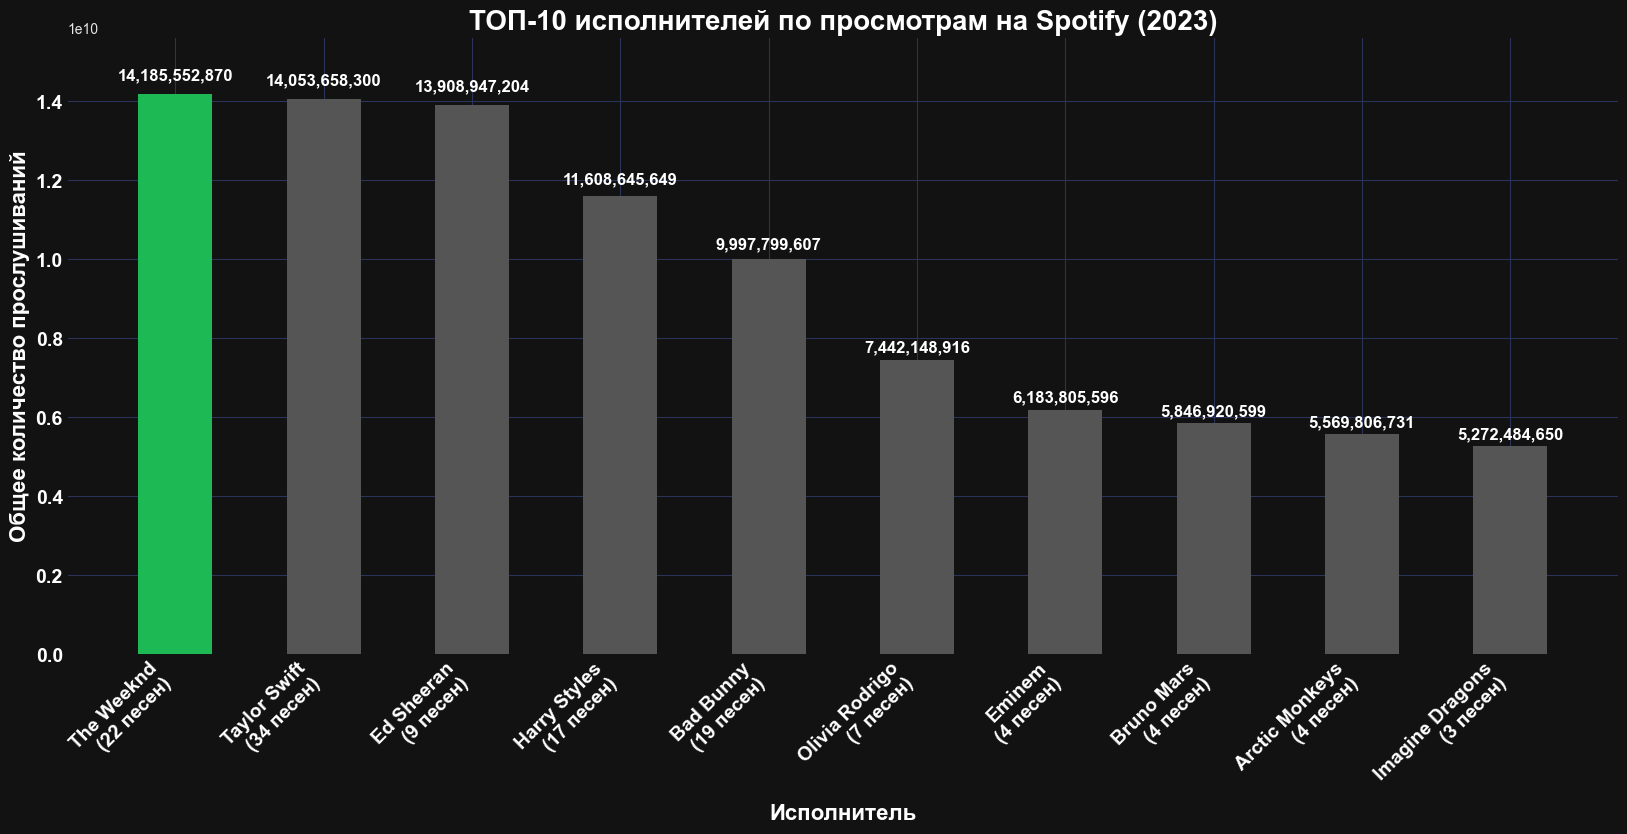

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(20, 8))

colors = ['#1DB954' if artist == 'The Weeknd' else '#555555' for artist in df_2['artist(s)_name']]

bars = plt.bar(df_2['artist(s)_name'], df_2['total_streams'], color=colors, width=0.5, align='center')

plt.xticks(
    ticks=range(len(df_2['artist(s)_name'])),
    labels=[f"{artist}\n({songs} песен)" for artist, songs in zip(df_2['artist(s)_name'], df_2['total_songs'])],
    rotation=45, ha='right', fontsize=14, fontweight='bold', fontname='Arial', color='white'
)
plt.yticks(fontsize=14, fontweight='bold', fontname='Arial', color='white')
plt.xlabel('Исполнитель', fontsize=16, fontweight='bold', fontname='Arial', color='white')
plt.ylabel('Общее количество прослушиваний', fontsize=16, fontweight='bold', fontname='Arial', color='white')

plt.title('ТОП-10 исполнителей по просмотрам на Spotify (2023)', fontsize=20, fontweight='bold', fontname='Arial', color='white')

for bar, value in zip(bars, df_2['total_streams']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.02, f"{value:,}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold', fontname='Arial', color='white')

plt.gca().set_facecolor('#121212') 
plt.gcf().set_facecolor('#121212')

plt.ylim(0, df_2['total_streams'].max() * 1.1)

plt.show()


plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_2.png')
)

#### выводы (2): написать выводы
**Самым прослушиваемым артистом за весь промежуток стал The Weekend**, действительно, самый легендарный исполнитель и обладатель нескольких хитов

##  (3) (hist plot или pair plot или kde plot)

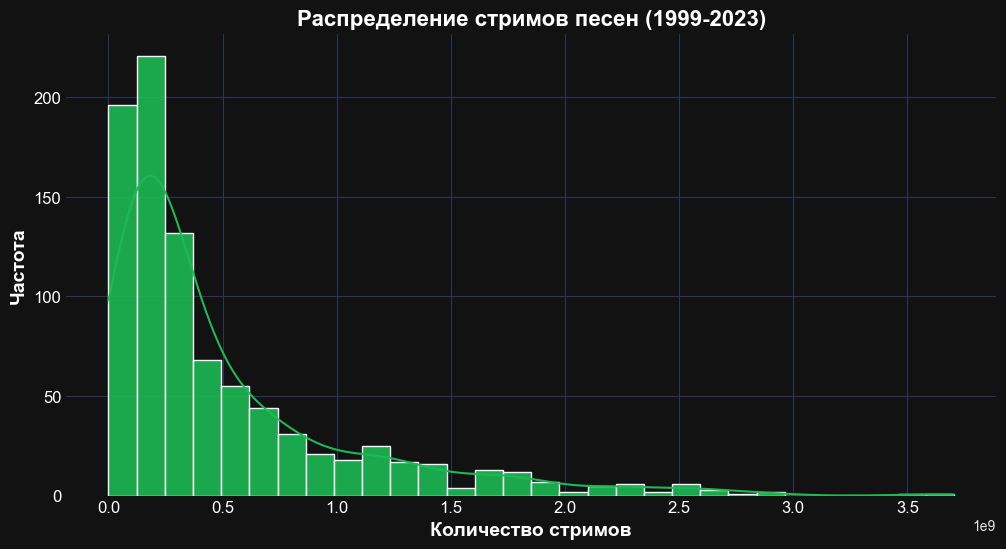

In [18]:
plt.figure(figsize=(12, 6))

sns.histplot(df_1999_2023['streams'], bins=30, kde=True, color='#1DB954', edgecolor='white', alpha=0.9)

plt.xlabel('Количество стримов', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Частота', fontsize=14, fontweight='bold', color='white')
plt.title('Распределение стримов песен (1999-2023)', fontsize=16, fontweight='bold', color='white')

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')


plt.gca().set_facecolor('#121212')  
plt.gcf().set_facecolor('#121212')  

plt.show()


#### выводы (3): написать выводы

Как видно из графика, в основном песни имеют не особо много стимов/просмотров по сравнению с другими топовыми треками: лишь некоторым трекам удается достичь популярности

##  (4) heatmap plot

In [19]:
print(df_1999_2023.select_dtypes('int').columns)

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


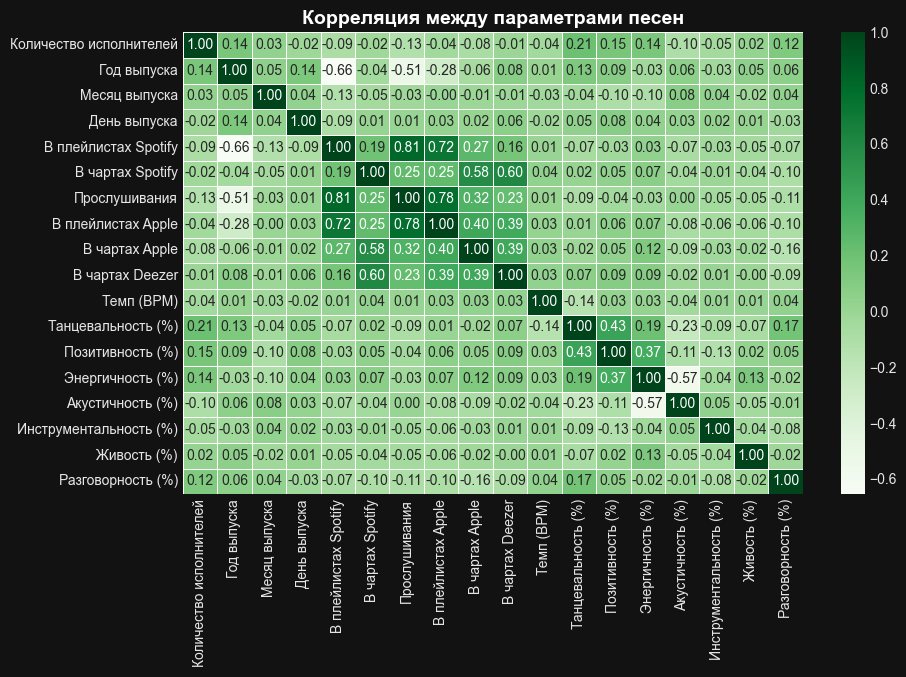

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 6))
df_1999_2023 = df_1999_2023.rename(columns={
    'artist_count': 'Количество исполнителей',
    'released_year': 'Год выпуска',
    'released_month': 'Месяц выпуска',
    'released_day': 'День выпуска',
    'in_spotify_playlists': 'В плейлистах Spotify',
    'in_spotify_charts': 'В чартах Spotify',
    'streams': 'Прослушивания',
    'in_apple_playlists': 'В плейлистах Apple',
    'in_apple_charts': 'В чартах Apple',
    'in_deezer_charts': 'В чартах Deezer',
    'bpm': 'Темп (BPM)',
    'danceability_%': 'Танцевальность (%)',
    'valence_%': 'Позитивность (%)',
    'energy_%': 'Энергичность (%)',
    'acousticness_%': 'Акустичность (%)',
    'instrumentalness_%': 'Инструментальность (%)',
    'liveness_%': 'Живость (%)',
    'speechiness_%': 'Разговорность (%)'
})

sns.heatmap(
    df_1999_2023[df_1999_2023.select_dtypes('int').columns].corr(), 
    annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)

plt.title("Корреляция между параметрами песен", fontsize=14, fontweight="bold", color="white")

plt.gca().set_facecolor('#121212')  
plt.gcf().set_facecolor('#121212')

plt.show()
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_4.png')
)


#### выводы (4): написать выводы

Видна одна интересная связь: чем раньше песня выпустилась, тем более часто еее слушают, о чем нам и говорит корреляция в 0.5
Кроме того, если песня есть в топ-чартах, то ее и чаще слушают)
Также появление трека в каком-либо чарте, например, в Spotify/Apple и т.д приводит к тому, что песня становится популярной и среди прочих чартов и рейтингах 

##  (5) plot  на ваш выбор

In [21]:
display(df_1999_2023)

,track_name,artist(s)_name,Количество исполнителей,Год выпуска,Месяц выпуска,День выпуска,В плейлистах Spotify,В чартах Spotify,Прослушивания,В плейлистах Apple,...,Темп (BPM),key,mode,Танцевальность (%),Позитивность (%),Энергичность (%),Акустичность (%),Инструментальность (%),Живость (%),Разговорность (%)
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


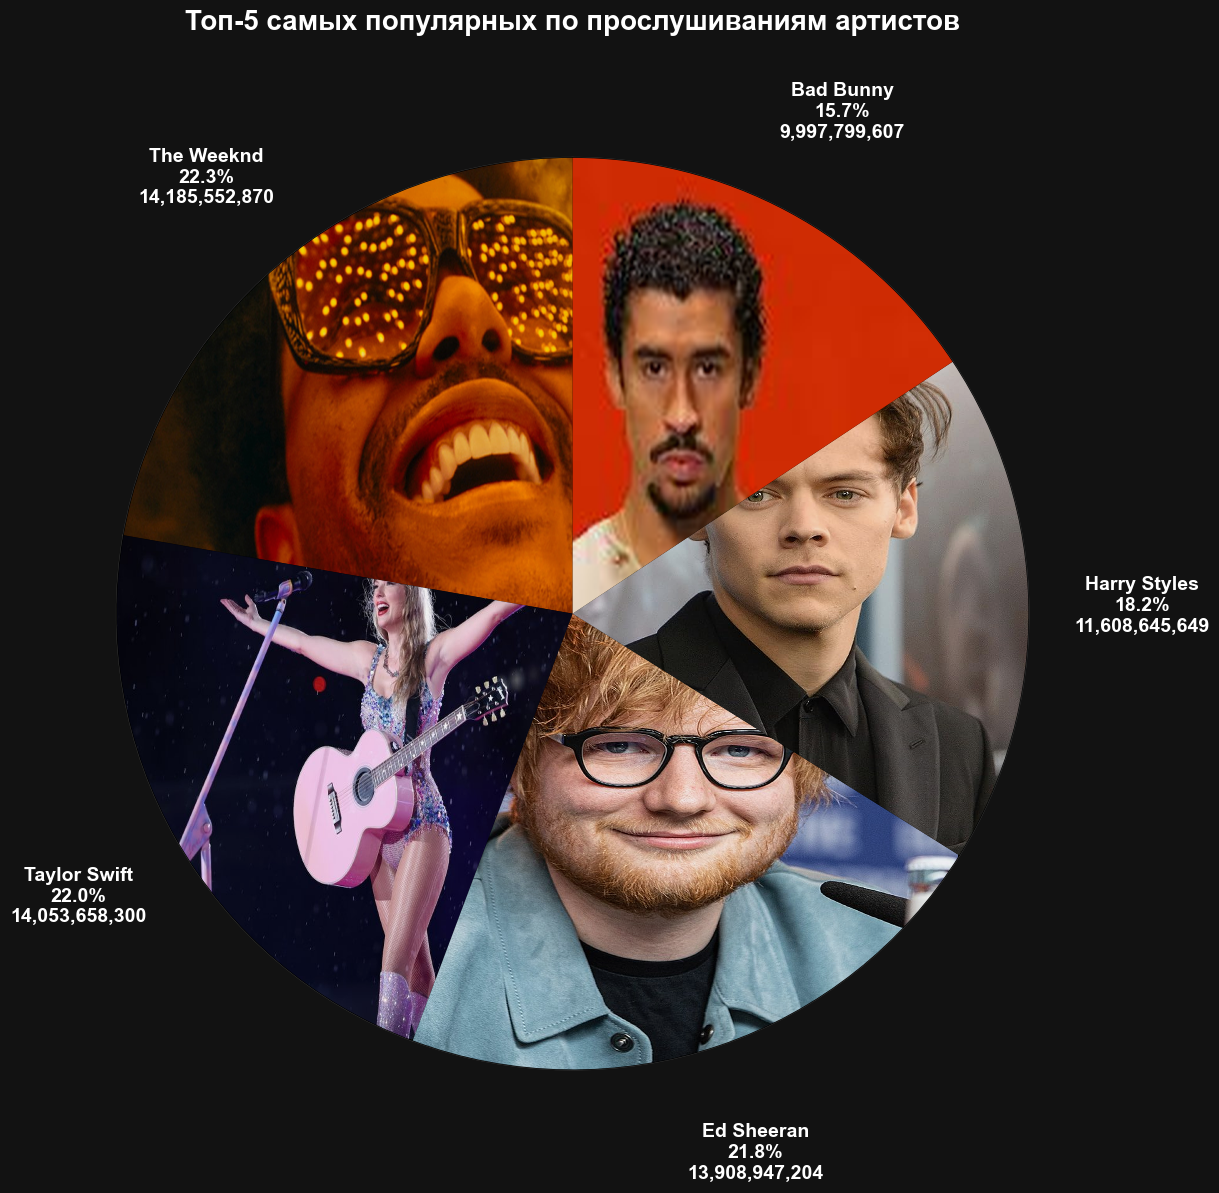

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import PathPatch
from matplotlib.colors import to_rgb


artists = ['The Weeknd', 'Taylor Swift', 'Ed Sheeran', 'Harry Styles', 'Bad Bunny']
streams = [14185552870, 14053658300, 13908947204, 11608645649, 9997799607]
colors = ['#1DB954', '#000000', '#ff0000', '#3498db', '#f39c12']
image_paths = {a: f"{a.lower().replace(' ', '')}.jpg" for a in artists}

fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor("#121212")
ax.set_facecolor("#121212")


total = sum(streams)
percentages = [s / total for s in streams]
percent_labels = [f"{p * 100:.1f}%" for p in percentages]
stream_labels = [f"{s:,}" for s in streams]

def prepare_image(path):
    """Загрузка изображения"""
    try:
        img = Image.open(path).convert('RGBA')
        img = img.resize((1500, 1500), Image.Resampling.LANCZOS)
        return img
    except Exception as e:
        print(f"Ошибка загрузки изображения {path}: {str(e)}")
        return None


wedges, texts = ax.pie(
    percentages,
    colors=['#1e1e1e'] * len(colors), 
    startangle=90,
    wedgeprops=dict(edgecolor='#404040', linewidth=1.5),
    autopct=None,
    textprops={'color': 'white', 'fontsize': 12}
)

def add_artist_image(wedge, img, zoom=0.35):
    """Добавляет фото артиста внутрь сектора"""
    theta = np.deg2rad((wedge.theta1 + wedge.theta2) / 2)
    r = wedge.r * 0.5 
    x, y = r * np.cos(theta), r * np.sin(theta)

    patch = PathPatch(wedge.get_path(), facecolor='none')
    ax.add_patch(patch)

    imagebox = OffsetImage(img, zoom=zoom, clip_path=patch, alpha=0.95)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, zorder=30)
    ax.add_artist(ab)


for i, (wedge, artist, percent, streams_str) in enumerate(zip(wedges, artists, percent_labels, stream_labels)):
    img = prepare_image(image_paths[artist])
    if img:
        add_artist_image(wedge, img, zoom=0.3)
    

    theta = np.deg2rad((wedge.theta1 + wedge.theta2) / 2)
    r = wedge.r * 1.25  # Дальше от центра
    x, y = r * np.cos(theta), r * np.sin(theta)

    ax.text(x, y, f"{artist}\n{percent}\n{streams_str}", color='white', fontsize=14, fontweight='bold',
            ha='center', va='center')


ax.set_title('Топ-5 самых популярных по прослушиваниям артистов\n', 
           color='white', fontsize=20, pad=40, fontweight='bold')

plt.axis('equal')
plt.tight_layout()
plt.show()



#### выводы (5): написать выводы


В топ 5 самых прослушиваемых артистов самый наибольший вклад вносит **Weekend** и **Taylor Swift**

# Итоговый вывод по всему датасету (по всему EDA)

In [24]:
print('well done!')

well done!
